- **Link to dataset on kaggle web site** [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

# Installing some useful Libraries and API for this project

In [ ]:
!pip install kaggle

In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

In [ ]:
from google.colab import files
files.upload()

# Downloading dataset through Kaggle's API

In [ ]:
cd /root/

/root


In [ ]:
ls

In [ ]:
!mkdir .kaggle
!mv /content/kaggle.json /root/.kaggle/kaggle.json

In [ ]:
cd /root/.kaggle/

/root/.kaggle


In [ ]:
ls

kaggle.json


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -p /content -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 28.7MB/s]


In [ ]:
cd /content/

/content


In [ ]:
ls

sample_data/  titanic.zip


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Removing any warnings messages

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importing Libraries & Loading datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lecture du fichier 
dataset1 = pd.read_csv("train.csv")
dataset1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset2 = pd.read_csv("test.csv")
dataset2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Viz

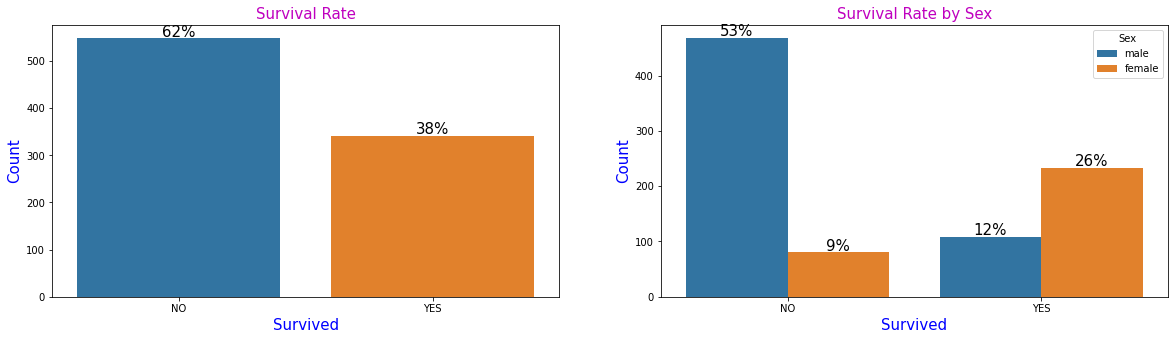

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5), sharex=True, constrained_layout=False)

sns.countplot(x="Survived", data=dataset1, ax=ax[0])
plt.xticks(np.arange(2), ('NO', 'YES'))
ax[0].set_xlabel("Survived", fontsize=15, color='b')
ax[0].set_ylabel("Count", fontsize=15, color='b')
ax[0].set_title("Survival Rate", fontsize=15, color='m')

sns.countplot(x="Survived", data=dataset1, hue="Sex", ax=ax[1])
plt.xticks(np.arange(2), ('NO', 'YES') )
ax[1].set_xlabel("Survived", fontsize=15, color='b')
ax[1].set_ylabel("Count", fontsize=15, color='b')
ax[1].set_title("Survival Rate by Sex", fontsize=15, color='m')


for o in range(2):
    for p in ax[o].patches:
      total = float(len(dataset1))
      height = p.get_height()
      ax[o].text(p.get_x()+p.get_width()/2.,
      height + 3, '{0:.0%}'.format(height/total), ha="center", fontsize=15)
plt.show()

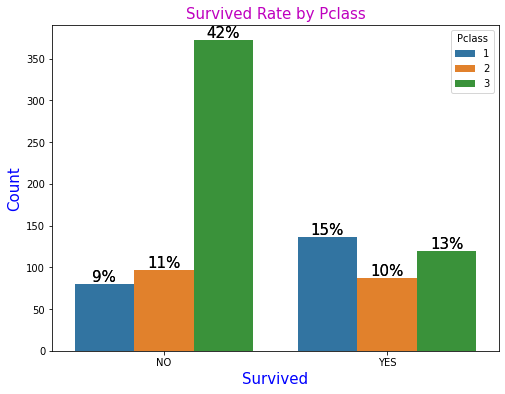

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(x="Survived", data=dataset1, hue="Pclass", ax=ax)
plt.title('Survived Rate by Pclass', fontsize=15, color='m')
plt.xlabel('Survived', fontsize=15, color='b')
plt.ylabel('Count', fontsize=15, color='b')
plt.xticks(np.arange(2), ('NO', 'YES'))
for k in range(2):
    for p in ax.patches:
      total = float(len(dataset1))
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
      height + 3, '{0:.0%}'.format(height/total), ha="center", fontsize=15)
plt.show()

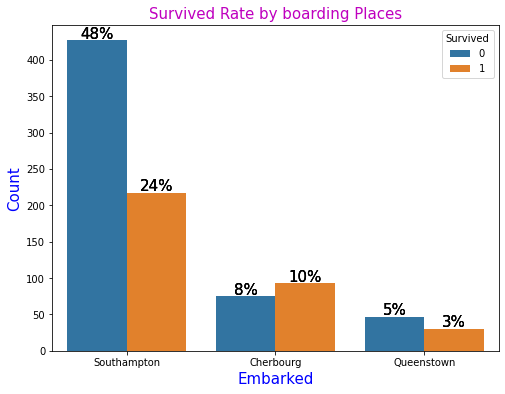

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=dataset1, x="Embarked", hue='Survived', ax=ax )
plt.title('Survived Rate by boarding Places', fontsize=15, color='m')
plt.xlabel('Embarked', fontsize=15, color='b')
plt.ylabel('Count', fontsize=15, color='b')
plt.xticks(np.arange(3), ('Southampton', 'Cherbourg', 'Queenstown'))
for k in range(3):
    for p in ax.patches:
      total = float(len(dataset1))
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
      height + 3, '{0:.0%}'.format(height/total), ha="center", fontsize=15)
plt.show()
plt.show()

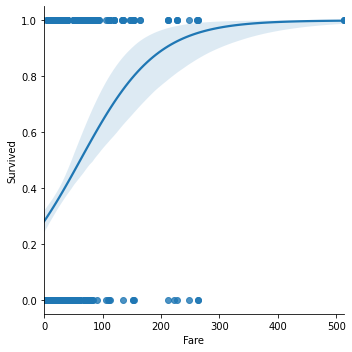

In [ ]:
sns.lmplot(x="Fare", y="Survived", data=dataset1, logistic=True)
plt.show()

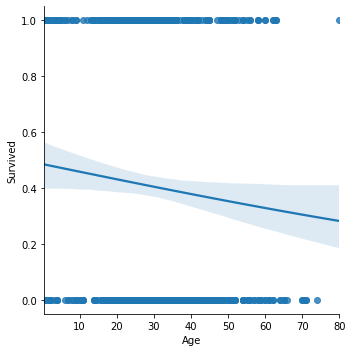

In [ ]:
sns.lmplot(x="Age", y="Survived", data=dataset1, logistic=True)
plt.show()

# Features Extraction

In [ ]:
dataset1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
"sir" in dataset1['Name']

False

In [ ]:
# Selection des variables
dataset1 = dataset1.loc[:, ["Survived", 
                          "Pclass", 
                          "Sex", 
                          "Age", 
                          "SibSp", 
                          "Parch",
                          "Fare",
                          "Embarked"]]
dataset1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
dataset2 = dataset2.loc[:, [ 
                          "Pclass", 
                          "Sex", 
                          "Age", 
                          "SibSp", 
                          "Parch",
                          "Fare",
                          "Embarked"]]
dataset2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
# Gestion des NaN 
# Enlever la colonne ID
# dataset = dataset.iloc[:, 1:]
# dataset = dataset.drop(['User ID'], axis=1)

In [ ]:
# Remplacement des NaN dans la colonne 'Age' par la mediane des âges
dataset1['Age'].fillna(value = dataset1['Age'].median(), inplace=True)
dataset1.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [ ]:
dataset1["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Remplacement des NaN dans la colonne 'Embarked' par 'S'
dataset1['Embarked'].fillna("S" , inplace=True)

In [ ]:
# Dummyfication 
dataset1 = pd.get_dummies(dataset1, drop_first=True)
dataset1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
#Test delete Embarked_Q and Parch columns
dataset1.drop(["Parch", "Embarked_Q"], axis=1, inplace=True)

In [ ]:
dataset1.isnull().any()

Survived      False
Pclass        False
Age           False
SibSp         False
Parch         False
Fare          False
Sex_male      False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [ ]:
#dataset2 -- test-set
dataset2.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

In [ ]:
# Remplacement des NaN dans la colonne 'Age' par la mediane des âges
dataset2['Age'].fillna(value=dataset2['Age'].median(), inplace=True)
dataset2.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

In [ ]:
# Remplacement des NaN dans la colonne 'Fare' par la median des 'Fare'
dataset2['Fare'].fillna(value=dataset2['Fare'].median(), inplace=True)
dataset2.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [ ]:
# Dummyfication
dataset2 = pd.get_dummies(data=dataset2, drop_first=True)
dataset2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [ ]:
#Test delete Embarked_Q and Parch columns
dataset2.drop(["Parch", "Embarked_Q"], axis=1, inplace=True)

In [ ]:
# Séparation des X & y pour le train-set:
X_t = dataset1.iloc[:,1:]
y_t = dataset1.iloc[:, 0]

In [ ]:
# Feature Scaling, Normalisation:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_t = sc_x.fit_transform(X_t)



In [ ]:
 #Train_test_split:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

In [ ]:
# Application du modèle
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred = classifier.predict(X_train)

In [ ]:
y_test_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, classification_report

In [ ]:
f1_score(y_test, y_test_pred)

0.7638888888888888

In [ ]:
# Parch en Embarked_Q deleted
f1_score(y_test, y_test_pred)

0.7448275862068966

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
# Parch en Embarked_Q deleted
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
# Evaluation du modèle
# NB Nous ne disposons pas des valeurs réelles de y_test, donc le score serait de 100%
print("Train score : {}".format(classifier.score(X_train , y_train)*100))
print("Test score : {}".format(classifier.score(X_test , y_test)*100))

Train score : 80.0561797752809
Test score : 81.00558659217877


In [ ]:
# Prédiction de y_test
X_test_kaggle = dataset2
y_test_kaggle_pred = classifier.predict(X_test_kaggle)

In [ ]:
y_test_kaggle_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Matrice de confusion 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
cm

array([[88, 17],
       [20, 54]])

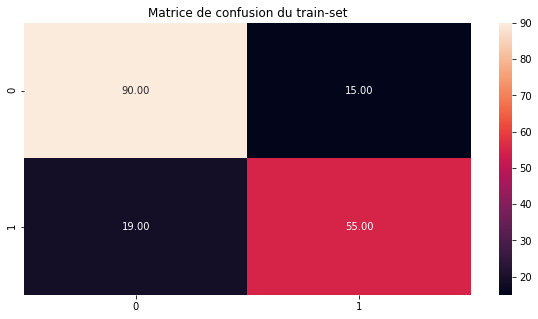

In [ ]:
# Visualisation
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(cm, annot=True, fmt='.2f' ) 
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Matrice de confusion du train-set")
plt.show()

In [ ]:
classifier.coef_.squeeze()

array([-0.79585841, -0.39643108, -0.32823226, -0.09823822,  0.1215213 ,
       -1.28414504, -0.04676949, -0.1929554 ])

Features importance

In [ ]:
coef = pd.DataFrame((abs(classifier.coef_.squeeze())).T, index=X_test_kaggle.columns, columns=['abs_coef'])
coef

,abs_coef
Pclass,0.795858
Age,0.396431
SibSp,0.328232
Parch,0.098238
Fare,0.121521
Sex_male,1.284145
Embarked_Q,0.046769
Embarked_S,0.192955


In [ ]:
coef['abs_coef'].sort_values(ascending=False)

Sex_male      1.284145
Pclass        0.795858
Age           0.396431
SibSp         0.328232
Embarked_S    0.192955
Fare          0.121521
Parch         0.098238
Embarked_Q    0.046769
Name: abs_coef, dtype: float64

In [ ]:
X_test_kaggle.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
# Test-set Feature importance 
imp = pd.DataFrame({"Features": ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_male", "Embarked_Q", "Embarked_S"],
              "Values": abs(classifier.coef_.squeeze())})
imp.sort_values( by ="Values", ascending=False)

,Features,Values
5,Sex_male,1.284145
0,Pclass,0.795858
1,Age,0.396431
2,SibSp,0.328232
7,Embarked_S,0.192955
4,Fare,0.121521
3,Parch,0.098238
6,Embarked_Q,0.046769


# Les femmes et les enfants d'abord, sans oublié les plus aisés!

En effet, nous pouvons constater avec stupéfaction que le top 3 des variables qui o ayant le plus d'impact dans la survie des passagers du titanic est : le sexe(Sex_male), la classe (Pclasse) ainsi que l'Age.  

In [ ]:
# Matrice de corrélation du train-set
corr = dataset1.corr()
f, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Matrice de corrélation du train-set")
plt.show()

In [ ]:
Survied = pd.DataFrame(data = y_test, columns = ["Survied"])
Survied.to_csv("y_test.csv")
Survied.head()

In [ ]:
# Reconstitution du test_set en incluant la colonne Survived
test_set = pd.concat((Survied, dataset2), axis=1)
test_set.head()

In [ ]:
S= test_set.iloc[:, 0]
G= test_set.iloc[:, 6]

In [ ]:
gender_submission_test = pd.concat((S, G), axis=1)
gender_submission_test.head()

In [ ]:
### Exportation de test_set de jupyter sous format csv 
test_set.to_csv("gender_submission_test.csv")

In [ ]:
# Amélioration de la prédiction
# Création d'un modèle d'arbres de decisions
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

In [ ]:
# Prédiction de y_test avec le modèle d'arbres de decisions
X_test = dataset2
y_test = classifier.predict(X_test)

In [ ]:
# Evaluation du modèle en pourcentage
print("Train Score : {}".format(classifier.score(X_train, y_train)*100))
print('Test Score : {}'.format(classifier.score(X_test, y_test)*100))

Nous constatons une nette amélioration de la prédiction du modèle.

In [ ]:
# Tentons d'appliquer un autre modèle : le random forest 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

In [ ]:
# Prédiction de y_test avec le random forest
X_test = dataset2
y_test = classifier.predict(X_test)

In [ ]:
# Evaluation du modèle en pourcentage
print("Train Score : {}".format(classifier.score(X_train, y_train)*100))
print('Test Score : {}'.format(classifier.score(X_test, y_test)*100))

Nous obtenons le même score qu'avec l'arbre de décision

In [ ]:
# Tentons de mettre plus d'arbres dans le random forest
classifier = RandomForestClassifier(n_estimators = 300, max_depth=20)
classifier.fit(X_train, y_train)

In [ ]:
# Prediction of y_test
X_test = dataset2
y_test = classifier.predict(X_test)

In [ ]:
# Evaluation du modèle en pourentage
print("Train Score : {}".format(classifier.score(X_train, y_train)*100))
print('Test Score : {}'.format(classifier.score(X_test, y_test)*100))

Nous obtenons les mêmes scores qu'avec les deux modèles précédents, nous pouvons alors supposer que le modèle a atteint son maximum de précision.
Il faut garder à l'esprit que nous ne pouvons pas atteindre les 100% dans une prédiction, étant que le modèle ne sera jamais parfait.
Les 100% du Test s'explique par le fait qu'il a été comparé à lui-même. Le Test doit être soumis à Kaggle afin d'évaluer sa précision.